# **Imbalanced Data**
Encountered in a classification problem in which the number of observations per class are disproportionately distributed.


## **How to treat for Imbalanced Data?**<br>

Introducing the `imbalanced-learn` (imblearn) package.

### Data

In [10]:
import pandas as pd
import seaborn as sns

In [7]:
from sklearn.datasets import make_classification

In [8]:
# make dummy data
X, y = make_classification(n_samples=5000, n_features=2, n_informative=2,
                          n_redundant=0, n_repeated=0, n_classes=3,
                          n_clusters_per_class=1,
                          weights=[0.01, 0.05, 0.94],
                          class_sep=0.8, random_state=0)

In [9]:
df = pd.DataFrame(X)
df.columns = ['feature1', 'feature2']
df['target'] = y

df.head()

,feature1,feature2,target
0,0.662420,-0.763477,2
1,-0.201381,-2.469794,2
2,1.208045,-0.332895,2
3,1.375456,0.974206,2
4,0.215885,-1.556261,2


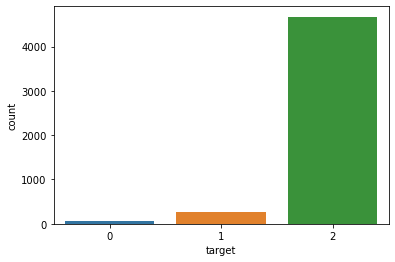

In [12]:
# visualize the data
sns.countplot(data=df, x=df['target']);

We can see that the data are very heavily imbalanced.

--------

# 1) Over-Sampling Approach


## 1.1) naive approach known as Random Over-Sampling
+ We will upsample our minority classes, that is sample with replacement until the number of observations is uniform across all classes.
+ As we can imagine this approach should give us a pause depending on the scale of upsampling we'll be doing.
+ `from imblearn.over_sampling import RandomOverSampler`

## 1.2) another approach is SMOTE (Synthetic Minority Oversampling Technique)
+ in the case, we generate new observations within the existing feature space over our minority classes.

### Now, let's apply an over-sampling approach. For this we'll use **a naive approach known as random over-sampling.**

In [21]:
from imblearn.over_sampling import RandomOverSampler

In [22]:
ros = RandomOverSampler(random_state=0)

In [23]:
X_resampled, y_resampled = ros.fit_resample(X, y)

### Let's visualize again after random over-sampling

In [28]:
df = pd.DataFrame(y_resampled, columns=['target'])

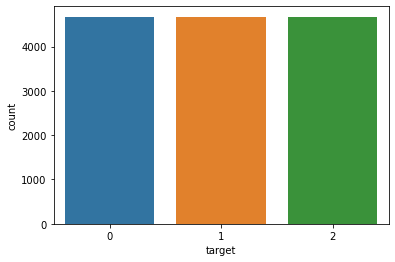

In [30]:
sns.countplot(data=df, x=df['target']);

We have increased the size of each of our minority classes to be uniform with that of our majority class through random sampling.

# 2) Under-Sampling Technique

## 2.1) Naive approach to randomly under-sample our majority class
+ this time we actually throwing out data in our majority class until the number of observations is uniform.
+ `from imblearn.under_sampling import RandomUnderSampler`

### Let's now try an under-sampling technique. Again, we'll start with a naive approach to randomly under-sample our majority class.

In [31]:
from imblearn.under_sampling import RandomUnderSampler

In [32]:
rus = RandomUnderSampler(random_state=0)

In [33]:
X_resampled, y_resampled = rus.fit_resample(X, y)

### Visualized the resampled data

In [34]:
df = pd.DataFrame(y_resampled, columns=['target'])

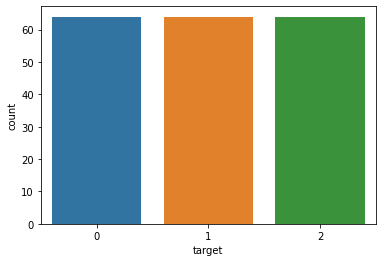

In [35]:
sns.countplot(data=df, x='target');

Data get blanced. However note that there are about 60 observations per class.

**Because of the infrequency of our smallest minority class, we threw out a huge percentage**.

So you might want to consider other methods for this data (like `k-means` and `near-miss`)